In [57]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Setup
os.chdir("..")
plt.style.use("ggplot")

%matplotlib inline

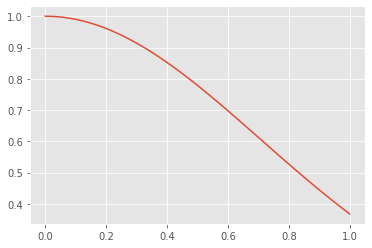

In [59]:
def f(x):
    return np.exp(-x**2)

t = np.linspace(0,1,100)
y = f(t)
plt.plot(t,y)

In [60]:
from gp.kernels import RBF
from gp.models import GPRegressor

In [61]:
ker = RBF(input_dim=1, l=1, sigma=1)
gpr = GPRegressor(input_dim=1, kernel_function=ker)

In [62]:
x = np.linspace(0,1,2)
yt = f(x)

gpr.fit(x[:,None],yt)
gpr._loglik

-2.153589764120121

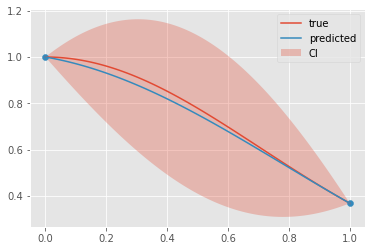

In [63]:
yp, std = gpr.predict(t[:,None], return_std=True)
plt.plot(t,y,label="true")
plt.plot(t,yp,label="predicted")
plt.fill_between(
    t,
    yp-1.96*std,
    yp+1.96*std,
    alpha=0.3,
    label="CI"
)
plt.scatter(x,yt)
plt.legend()